In [1]:
import re
from bs4 import BeautifulSoup
import requests
import json
import datetime
import codecs

In [2]:
cmt = input()
cmtu2 = r'http://coral.qq.com/article/'+str(cmt)+r'/comment/v2?callback=_article'+str(cmt)+r'commentv2&orinum=30&oriorder=o&pageflag=1&cursor='
cmtu3 =r'&scorecursor=0&orirepnum=2&reporder=o&reppageflag=1&source=1&_=1540911539487'
url1 = cmtu2 +'0' +cmtu3
url1

3616861095


'http://coral.qq.com/article/3616861095/comment/v2?callback=_article3616861095commentv2&orinum=30&oriorder=o&pageflag=1&cursor=0&scorecursor=0&orirepnum=2&reporder=o&reppageflag=1&source=1&_=1540911539487'

In [2]:
%%time
headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'
        }
ct = []
ctid = []
ctn = []
tt = []
last = 0
cmt = input()
cmtu2 = r'http://coral.qq.com/article/'+str(cmt)+r'/comment/v2?callback=_article'+str(cmt)+r'commentv2&orinum=30&oriorder=o&pageflag=1&cursor='
cmtu3 =r'&scorecursor=0&orirepnum=2&reporder=o&reppageflag=1&source=1&_=1540911539487'
#txt = codecs.open('newscomment.txt','a',encoding = 'utf-8')

baosong_list = []
while 1:
    cmtu = cmtu2+str(last)+cmtu3
    t1 = requests.get(cmtu,headers = headers)
    #print(t1.encoding)
    t2 = t1.text
    t3 = re.search('\\((.+)\\)',t2)
    t4 = json.loads(t3.group(1))
    oriretnum = t4['data']['oriretnum']
    #print(oriretnum)
    if not t4['data']['last']:
        #print('第%d条新闻爬取完毕！标题：%s'%(i+1,namelist[i]))
        break;
    for j in range(oriretnum):
        c_t = t4['data']['oriCommList'][j]['content']
        ct.append(c_t)
        ct_id = t4['data']['oriCommList'][j]['userid']
        ctid.append(ct_id)
        t_t = t4['data']['oriCommList'][j]['time']
        t_t_ = datetime.datetime.fromtimestamp(int(t_t)).strftime('%Y-%m-%d %H:%M:%S')
        tt.append(t_t_)
        ct_n = t4['data']['userList'][str(ct_id)]['nick']
        ctn.append(ct_n)
        baosong = '“腾讯新闻客户端”用户“'+ct_n+'”：'+c_t
        baosong_list.append(baosong)
        #print('“腾讯新闻客户端”用户“%s”：%s'%(ct_n,c_t))
        print(baosong)
        
        #js_ctn = json.dumps('【非正式-正面】“腾讯新闻客户端”用户“'+ct_n+'”：'+c_t,ensure_ascii=False)+'\n'
        #txt.write(js_ctn)
        #true_cmt.append('【非正式-正面】“腾讯新闻客户端”用户“'+ct_n+'”：'+c_t)
    #print(true_cmt)
    last = t4['data']['last']
#txt.close()
#print(baosong_list)
oritotal = t4['data']['oritotal']
print('\n共有%d条评论'%oritotal)

3835922081
“腾讯新闻客户端”用户“许多年以后”：幸福不会从天而降，小康社会等不来。打好脱贫攻坚战，一方面要坚决根除“等靠要”的思维，克服畏难情绪，敢闯敢拼，主动投身于新时代火热的奋斗大潮，在脱贫攻坚的伟大事业中勇于作为；另一方面，要用好“精准扶贫”这个政策法宝，扎扎实实从一村一寨的实际情况出发，摸清“老底子”、开对“药方子”、拔掉“穷根子”，把扶贫资金用在刀刃上，让扶贫政策打通“最后一公里”，真真正正把扶贫工作做到根上、点上，解决好困难群众的发展问题。
“腾讯新闻客户端”用户“幸福”：特色社会新时代，
脱贫攻坚民称快。
念兹在兹心牵挂，
心系少数民族大情怀。
共商脱贫致富计，
脱贫良方主席开。
人民赶上好日子，
实现脱贫幸福来。
永远紧跟习主席，
边疆未来更璀璨。
“腾讯新闻客户端”用户“苏河”：保障和改善民生没有终点站，只有连续不断的新起点。脱贫只是第一步，更好的日子还在后头。让我们在习近平新时代中国特色社会主义思想指导下，继续拼搏奋斗，朝着全体人民共同富裕、社会全面进步的目标奋进。
“腾讯新闻客户端”用户“蓉蓉”：党的十八大以来，习近平总书记多次深入民族地区调研，与乡亲们共商脱贫致富大计，开出一张张脱贫“药方”。深度贫困地区脱贫攻坚是硬仗中的硬仗，要加大扶贫资金投入力度，重点向农牧区、边境地区、特困人群倾斜，建立精准扶贫工作机制，扶到点上、扶到根上、扶贫扶到家。找准发展路子、苦干实干，让人民过上幸福美好的生活是我们的奋斗目标，全面建成小康社会一个民族、一个家庭、一个人都不能少。向习主席致敬！
“腾讯新闻客户端”用户“徐亮”：打赢脱贫攻坚战，不获全胜不收兵。
鼓足干劲明方向，掷地有声正风气。
意蕴深远言隽语，咬定青山不放松。
确保经济大稳定，民生保障高水平。
促进民族共繁荣，人民获得幸福感。
摘帽脱帽永致富，小康生活为目标。
全面从严来治党，强化作风和建设。
提提生活高质量，快快乐乐奔小康！
[心][心][心][心][心][心][六六六][六六六][六六六][六六六][六六六][六六六]
[打电话][打电话][打电话][打电话][打电话][打电话][点赞][点赞][点赞][点赞][点赞][点赞]
“腾讯新闻客户端”用户“李朝国”：少数民族，大多生活在边远山区，交通、水利、通讯等基础设施建设落后，生产生活等自然条件比较差，困难群体比较多。党和政府，历来都

“腾讯新闻客户端”用户“sevenup”：精准扶贫，打好脱贫攻坚战，做到一个民族，一个家庭，一个人都不能少！
“腾讯新闻客户端”用户“李玉梅”：确保脱贫攻坚任务:“一个民族、一个家庭、一个人都不能少！”
习主席说到做到，说的真好。这是百姓之福！！
“腾讯新闻客户端”用户“七七”：相信在习主席的带领下，我们的祖国越来越美好！
“腾讯新闻客户端”用户“Miller”：脱贫攻坚克难国家重点计划
“腾讯新闻客户端”用户“向往自由”：如所有干部都这样，祖国会更加富强👍
“腾讯新闻客户端”用户“yoki”：脱离贫困，一个民族、一个家庭、一个人都不能少。
“腾讯新闻客户端”用户“张工”：习主席还在百忙之中多次回复乡亲们的来信，信中饱含对少数民族贫困群众的深深牵挂，习主席强调让人民过上幸福美好生活是我们的奋斗目标，全面建成小康社会一个民族、一个家庭、一个人都不能少。
“腾讯新闻客户端”用户“沈軍”：举国上下，全面推出大打脱贫攻坚战。为早日实现全民奔小康而共同努力，人民的生活会越来越好[点赞][点赞][点赞]
“腾讯新闻客户端”用户“小敬”：幸福就在眼前，勇往直前奔小康，为祖国点赞。
“腾讯新闻客户端”用户“树林”：我国有了这样关心爱护人民的好主席，好总书记，是中国人民的福。
“腾讯新闻客户端”用户“赵勇”：少数民族脱贫：民族文化，经济得到支持发展；生活水平，身心健康，教育深入提高；传统技艺得到传承。
“腾讯新闻客户端”用户“天使的眼泪”：全面建成小康社会一个民族、一个家庭、一个人都不能少。
“腾讯新闻客户端”用户“海歌”：心有牵挂，情系少数民族脱贫。
“腾讯新闻客户端”用户“心蕊由子”：确保脱贫攻坚任务:“一个民族、一个家庭、一个人都不能少！”
习主席说到做到，百姓之福！！👍👍👍
“腾讯新闻客户端”用户“陌生的森林”：扶在点上，扶在根上，扶贫扶到家。
“腾讯新闻客户端”用户“晨曦”：在习主席英明领导关怀下我们一定会打赢扶贫攻坚战。
“腾讯新闻客户端”用户“yls123”：祝贺独龙族实现整族脱贫，同时脱贫只是第一步，更好的日子还在后头！
“腾讯新闻客户端”用户“黃菳鱶灬水境”：脱贫攻坚，任重道远。。
“腾讯新闻客户端”用户“生命时空流逝”：加油祖国脱贫脱困只是第一步全国五十六个民族一个都不能少全部过上好日子都过上美好生活还有很长的路要走加油中国奋发图强
“腾讯新闻客户端”用户“九九归

“腾讯新闻客户端”用户“初心”：少数民族地区的脱贫攻坚，由于其地理、环境和历史等因素，是我国实现全面脱贫攻坚的关键。
“腾讯新闻客户端”用户“灵芝”：全面脱贫，坚定不移。全面小康，永往直前。说到做到，诚信于民。千古难寻的好领袖。习主席英明。
“腾讯新闻客户端”用户“尽头”：习主席心连亿民与人民永远心连心在一起
“腾讯新闻客户端”用户“泪洒尘缘！！！”：党没有忘了少数民族！党在我们心中，中国共产党万岁！我庆幸我是中国人，我们的生活不断的提高，感谢党感谢习主席，祝中国鹏飞发展大展宏图。
“腾讯新闻客户端”用户“李生”：脱贫是它习主席关心老百姓的举措，一定要实现！为实现中国梦努力奋斗！
“腾讯新闻客户端”用户“心想事成”：改变民族脱贫攻坚。
“腾讯新闻客户端”用户“老萝卜”：习总书记为了各民族脱贫致富，走遍祖国大地，多次深入民族边远地区调研，为的是让各民族过上幸福美好的生活，吃水不忘挖井人，幸福不忘共产党，脱贫，致富不忘习主席。
“腾讯新闻客户端”用户“滨湖医务室”：好书记！！！
“腾讯新闻客户端”用户“百事可乐”：把人民的疾苦放在心上的好主席
“腾讯新闻客户端”用户“流星之雨”：脱贫攻坚 实现全面小康
“腾讯新闻客户端”用户“梦和初心的脚步我是荆州妈妈”：希望各个民族在习主席的亲切关怀和领导下，积极努力的带领百姓打赢脱贫攻坚战，让百姓有更好的获得感和幸福美好的生活！
“腾讯新闻客户端”用户“往事随风”：中华民族有未来,改革开放创辉煌!
“腾讯新闻客户端”用户“诚实使者”：少数民族脱贫尤为重要。
“腾讯新闻客户端”用户“零点”：领导是好领导，为人民所想，坚决拥护
“腾讯新闻客户端”用户“村姑15898070851”：扶贫！👍👍👍👍👍👍👍
“腾讯新闻客户端”用户“掠过多少风云”：扶贫，不让贫困困扰任何一个人。
“腾讯新闻客户端”用户“2019”：在习总的带领下愿老百姓的日子越过越好
“腾讯新闻客户端”用户“康乃馨”：支持习主席的领导。👍👍👍👍👍👍
“腾讯新闻客户端”用户“Alexandra”：永远紧跟习主席，幸福快乐嗨起来。
“腾讯新闻客户端”用户“一切皆有可能”：促进民族共繁荣，人民获得幸福感。
“腾讯新闻客户端”用户“概念沙龙，Jackie”：民心！[心][心][心][心][点赞][点赞]
“腾讯新闻客户端”用户“南无阿弥陀佛”：全民共同奔小康，共同发展。
“腾讯新闻客

“腾讯新闻客户端”用户“不披马甲了”：👍👍👍👍👍👍
“腾讯新闻客户端”用户“a-18515026220”：念茲在茲
“腾讯新闻客户端”用户“外太空”：体现大家庭的魅力
“腾讯新闻客户端”用户“帅气的姚美丽”：❤️
“腾讯新闻客户端”用户“朱”：公平
“腾讯新闻客户端”用户“静”：坚持脱贫攻坚！
“腾讯新闻客户端”用户“周”：习主席关心贫苦百姓，点赞
“腾讯新闻客户端”用户“太阳”：勤奋创造幸福
“腾讯新闻客户端”用户“天长地久”：习主席牵挂人民
“腾讯新闻客户端”用户“巴山夜雨”：大爱无疆
“腾讯新闻客户端”用户“缘分”：😁😁😁😁😁😁
“腾讯新闻客户端”用户“胖兔子”：全中国人是一家
“腾讯新闻客户端”用户“jihuguw77h”：好日子还在后头！
“腾讯新闻客户端”用户“伊人🍓🍓莟香”：身在中国🇨🇳而感到自豪
“腾讯新闻客户端”用户“自由者”：全靠主席领导，生活越来越好
“腾讯新闻客户端”用户“桂子”：打蠃脱贫攻坚战，全国人民奔小康！
“腾讯新闻客户端”用户“洋洋”：坚持
“腾讯新闻客户端”用户“喏”：找准特色，真抓实干
“腾讯新闻客户端”用户“酸奶家族（银座步行街）”：👍👍👍👍👍👍👍👍👍👍👍👍👍
“腾讯新闻客户端”用户“面朝大海”：好样的
“腾讯新闻客户端”用户“跑马山上”：伟大！
“腾讯新闻客户端”用户“甬力健”：中国必将越强！
“腾讯新闻客户端”用户“霞光”：深入人心！！！
“腾讯新闻客户端”用户“健康至上”：找准路子
“腾讯新闻客户端”用户“张露”：[推2][推2][推2][推2][推2][推2]
“腾讯新闻客户端”用户“我行我素”：期待更美好的生活
“腾讯新闻客户端”用户“活出自我”：中国好主席
“腾讯新闻客户端”用户“玉瓶”：为主席点赞
“腾讯新闻客户端”用户“唯一”：习主席，太崇拜你了，你是中国的希望，人民的好主席
“腾讯新闻客户端”用户“任华明rhm”：绿水清山
“腾讯新闻客户端”用户“Tang”：贫穷不是社会主义的本质，共同致富。
“腾讯新闻客户端”用户“胡文锋”：加快脱贫致富
“腾讯新闻客户端”用户“穿越火线”：主席好
“腾讯新闻客户端”用户“怀念巴乔”：每个人都不落下！
“腾讯新闻客户端”用户“小喵呜🐱”：嗯呐
“腾讯新闻客户端”用户“莎车县雷斌”：👍️👍️
“腾讯新闻客户端”用户“Bernard Lim”：Good
“腾讯新闻客户端”用户

In [1]:
def is_mixed(a, b, s):
    #字符串转换为列表
    a_list = list(a)
    b_list = list(b)
    s_list = list(s)
    
    #索引初始化
    m = 0
    n = 0
    
    for i,item in enumerate(s_list):
        if a_list[m] == item:
            m+=1
        elif b_list[n] == item:
            n+=1
        else:
            return False
        
    return True
        

a = 'chdkeold'
b = 'jgkhqp'
s = 'cjhdkgkheqopld'
print(is_mixed(a, b, s))

True


In [8]:
def is_mixed(a,b,s):
    m = len(a)
    n = len(b)
    table = [[False for _ in range(n+1)]for _ in range(m+1)]
    print('初始表：',table)
    
    if m+n !=len(s):
        return False
    
    for i in range(m):
        for j in range(n):
            if i == 0 and j == 0:
                table[i][j] = True
                #print('1:%d and %d is'%(i,j),table[i][j])
            elif i == 0 and b[j-1] == s[j-1]:
                table[i][j] = table[i][j-1]
                #print('2:%d and %d is'%(i,j),table[i][j])
            elif j == 0 and a[i-1] == s[i-1]:
                table[i][j] = table[i-1][j]
                #print('3:%d and %d is'%(i,j),table[i][j])
            
            if i>0 and j>0:
                if a[i-1] == s[i+j-1] and b[j-1] != s[i+j-1]:
                    table[i][j] = table[i-1][j]
                    print('一变',table)
                    print('4:%d and %d is'%(i,j),table[i][j])
                elif a[i-1] != s[i+j-1] and b[j-1] == s[i+j-1]:
                    table[i][j] = table[i][j-1]
                    print('二变',table)
                    print('5:%d and %d is'%(i,j),table[i][j])
                elif a[i-1] == s[i+j-1] and b[j-1] == s[i+j-1]:
                    table[i][j] = table[i-1][j] or table[i][j-1]
                    print('三变',table)
                    print('6:%d and %d is'%(i,j),table[i][j])
            else:
                pass
                    
    print(table)
                
    return table[m][n]


a = 'chkdeold'
b = 'jgkhqp'
s = 'cjhkdgkheqopld'

x = 'xxy'
y = 'xxz'
z = 'xxxxzy'
print(is_mixed(a, b, s))
#print(is_mixed(x, y, z))        

初始表： [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False]]
二变 [[True, False, False, False, False, False, False], [True, True, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False]]
5:1 and 1 is True
二变 [[True, False, False, False, False, False, False], [Tr

In [7]:
def is_mixed(a,b,s):
    if len(a)+len(b)!=len(s):
        return False
    
    if (a == '') and (b == s):
        print(b)
        print(s)
        return True
    elif (a == '') and (b!=s):
        print(s)
        return False;
    
    if (b == '') and (a == s):
        print(a)
        print(s)
        return True
    elif (b == '') and (a!=s):
        print(s)
        return False;
    
    if (s[0] == a[0]) and (s[0] !=b[0]):
        print('a:',s[0])
        print(s)
        if len(a) !=1:
            return is_mixed(a[1:],b[0:],s[1:])
        else:
            return is_mixed('',b[0:],s[1:])
    elif (s[0] == b[0]) and (s[0] != a[0]):
        print('b:',s[0])
        print(s)
        if len(b) !=1:
            return is_mixed(a[0:],b[1:],s[1:])
        else:
            return is_mixed(a[0:],'',s[1:])
    elif (s[0] == a[0]) and (s[0] == b[0]):
        #print('a&b:',s[0])
        return is_mixed(a[1:],b[0:],s[1:]) or is_mixed(a[0:],b[1:],s[1:])
    else:
        #return False
        print('erro:',s[0])
        return False;
    
    
    

a = 'chkdeold'
b = 'jgkhqp'
s = 'cjhkdgkheqopld'

o = 'gsdjakdasfs'
p = 'cbnxcmzx'
q = 'cgsbdnjakxdacmzsfxs'

x = 'ak'
y = 'aaab'
z = 'aaakcb'
#print(is_mixed(a, b, s))
print(is_mixed(x, y, z))
#print(is_mixed(o,p,q))

b: a
aakcb
b: a
akcb
a: k
kcb
cb
b: a
akcb
a: k
kcb
cb
a: k
kcb
cb
erro: k
False


In [92]:
def how_many_ways(n):
    # 递归方法
    if (n == 1 or n == 0) : 
        return 1
    elif (n == 2) : 
        return 2
      
    else : 
        return how_many_ways(n - 3) + how_many_ways(n - 2) + how_many_ways(n - 1)
        
def how_many_ways_2(n):
    #动态规划方法
    tab = [0 for i in range(n+1)] 
    tab[0] = 1
    tab[1] = 1
    tab[2] = 2
      
    for i in range(3, n + 1) : 
        tab[i] = tab[i - 1] + tab[i - 2] + tab[i - 3] 
      
    return tab[n]

n = 5 
print('递归方法：',how_many_ways(n))
print('动态规划方法：',how_many_ways_2(n))

递归方法： 13
动态规划方法： 13


In [87]:
def count(n): 
  
    # table[i] will store count of solutions for value i. 
    # Initialize all table values as 0. 
    table = [0 for i in range(n+1)] 
  
    # Base case (If given value is 0) 
    table[0] = 1
  
    # One by one consider given 3 moves and update the 
    # table[] values after the index greater than or equal 
    # to the value of the picked move. 
    for i in range(1, n+1): 
        table[i] += table[i-1] 
    for i in range(2, n+1): 
        table[i] += table[i-2] 
    for i in range(3, n+1): 
        table[i] += table[i-3] 
  
    return table[n]

count(5)

5

In [86]:
class Dp1(object):                                     #动态规划类
    def __init__(self,n):                              #初始化
        self.mark = [0 for _ in range(n+1)]           #定义一个一维数组，初始化全部为0，长度为台阶数。用来当作“备忘录”。
        print (self.dp(n))                               #开始递归
    def dp(self,n):                                    #递归的方法
        self.m = 0                                     #m的含义是当前n个台阶有m种跳法
        if self.mark[n] != 0:                          #先从备忘录寻找n，若存在mark[n]不等于0,则代表曾经计算过，n个台阶有mark[n]种跳法
            self.m = self.mark[n]                      #若备忘录有，则直接得到n层台阶的答案
        elif n <= 0:                                   #从这里开始的四行是用来判断“边界问题”
            if n == 0:                                 #若刚好跳完台阶，则这样算一种方法
                self.m = 1                             #m变成1,代表是一种可行方法
            else:                                      #有可能跳的台阶超过实际台阶数
                self.m = 0                             #m为0,代表不可行
        elif n>0:                                      #这里两行是用于规划转移方程式（其实这里很简单），青蛙只有两种可能，跳一层或者跳两层。
            self.m = self.dp(n-3)+self.dp(n-2)+self.dp(n-1)         #当前n层台阶的解个数 等于 n-1层台阶的解 + n-2层台阶的解
        self.mark[n] = self.m                          #把m放入备忘录，下次若是再次是n层台阶，则不用计算直接取备忘录的数。（优化）
        return self.m                                  #返回
 
if __name__ == '__main__':
    dp1 = Dp1(6)


24


In [94]:
#chr(ord('a'))
import sys
sys.maxsize

9223372036854775807

In [64]:
from collections import Counter

dict(Counter(list(s)))

{'c': 1,
 'j': 1,
 'h': 2,
 'd': 2,
 'k': 2,
 'g': 1,
 'e': 1,
 'q': 1,
 'o': 1,
 'p': 1,
 'l': 1}

In [1]:
import pandas as pd

f = open(r'C:\Users\hujia\Desktop\16.csv')
data = pd.read_csv(f)
f.close()

In [2]:
data['省份'].value_counts()

全国     9
浙江     9
湖北     7
四川     7
广东     7
河南     6
北京     6
山东     5
湖南     5
江西     5
上海     5
福建     5
云南     4
安徽     4
陕西     3
河北     3
江苏     3
重庆     2
天津     1
日本     1
吉林     1
广西     1
黑龙江    1
Name: 省份, dtype: int64

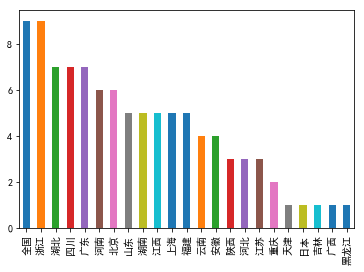

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

data['省份'].value_counts().plot(kind = 'bar')
#plt.show()

In [5]:
t = data['省份'].value_counts()
type(t)

pandas.core.series.Series

In [6]:
from pyecharts import Map

m = Map('',title_pos = 'center',title_text_size = 24,width = 1000,height = 600)
m.add('',
    t.index.tolist(),
    t.values.tolist(),
    maptype = 'china',
    is_label_show = True,
    is_visualmap = True,
    visual_pos = '10%',
    visual_top = '50%',
    visual_range = [0,10],
    visual_range_text = ['低','高'],
    visual_range_color = ['#FDF5E6','#FFA500','#FF0000']
)
m

In [22]:
from pyecharts import Map

data = {
    "邱县":190619,
"磁县":197351,
"肥乡区":69398,
"成安县":79588,
"魏县":204345,
"峰峰矿区":93145,
"邯山区":98403,
"丛台区":110069,
"临漳县":111463,
"复兴区":75636,
"涉县":231457,
"鸡泽县":78629,
"永年区":113273,
"曲周县":136088,
"大名县":174591,
"武安市":389771,
"广平县":138713,
"馆陶县":142933
    }

n = Map('',title_pos = 'center',title_text_size = 24,width = 1000,height = 600)
n.add('',
    list(data.keys()),
    list(data.values()),
    maptype = '邯郸',
    is_label_show = True,
    is_visualmap = True,
    label_pos = 'bottom',
    label_text_size = '16',
    visual_pos = '10%',
    visual_top = '50%',
    visual_range = [0,400000],
    visual_range_text = ['低','高'],
    visual_range_color = ['#FDF5E6','#FFA500','#FF0000'],
    is_map_symbol_show=False
)
#n._get_all_options()
#n.get_js_dependencies()
#n.print_echarts_options()
n

In [3]:
from pyecharts import datasets

datasets.coordinates.search_coordinates_by_keyword('丛台区')
#datasets.coordinates._load_coordinates()


{'丛台区': [114.64, 36.63]}

In [3]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)


ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [3]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Loading BokehJS ...

In [46]:
def twoSum(nums,target):
    output = []
    for i,item in enumerate(nums):
        n = target-item
        if n in nums :
            if i != nums.index(n):
                output.append(i)
                output.append(nums.index(n))
            else:
                continue

        return output

In [47]:
num = [3,2,4]
tar = 6
twoSum(num,tar)

[1, 2]